In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set()

## Cargo dataset limpio y preprocesado

In [2]:
df_netflix = pd.read_csv("dataset_netflix_limpio.csv")

In [3]:
df_netflix

,type,title,director,country,date_added,release_year,rating,duration,category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8782,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8783,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8784,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8785,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


## type

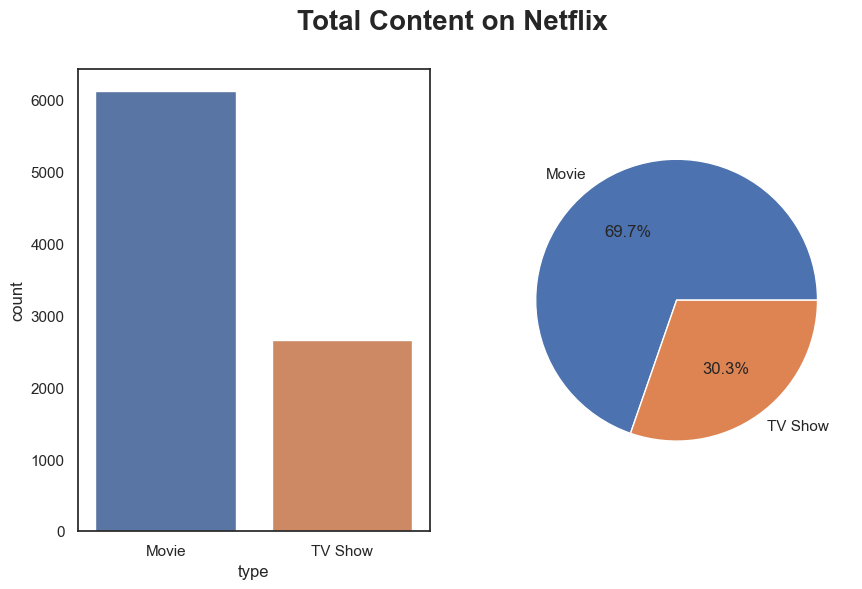

In [51]:
#grafico de barras y torta para mostrar la categoria del contenido
freq=df_netflix['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(10, 6))

sns.countplot(df_netflix, x=df_netflix['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.1f%%')

plt.suptitle('Total Content on Netflix', fontsize=20, weight='bold')
plt.savefig("total_content.png")

## director

In [5]:
#tomo los 5 directores que mas contenido tienen en netflix exceptuando los no dados (not given) 
top_directors = df_netflix['director'].value_counts().head(16)[1:16]
top_directors

director
Rajiv Chilaka                   20
Raúl Campos, Jan Suter          18
Alastair Fothergill             18
Marcus Raboy                    16
Suhas Kadav                     16
Jay Karas                       14
Cathy Garcia-Molina             13
Martin Scorsese                 12
Jay Chapman                     12
Youssef Chahine                 12
Steven Spielberg                11
Don Michael Paul                10
Mark Thornton, Todd Kauffman    10
David Dhawan                     9
Shannon Hartman                  8
Name: count, dtype: int64

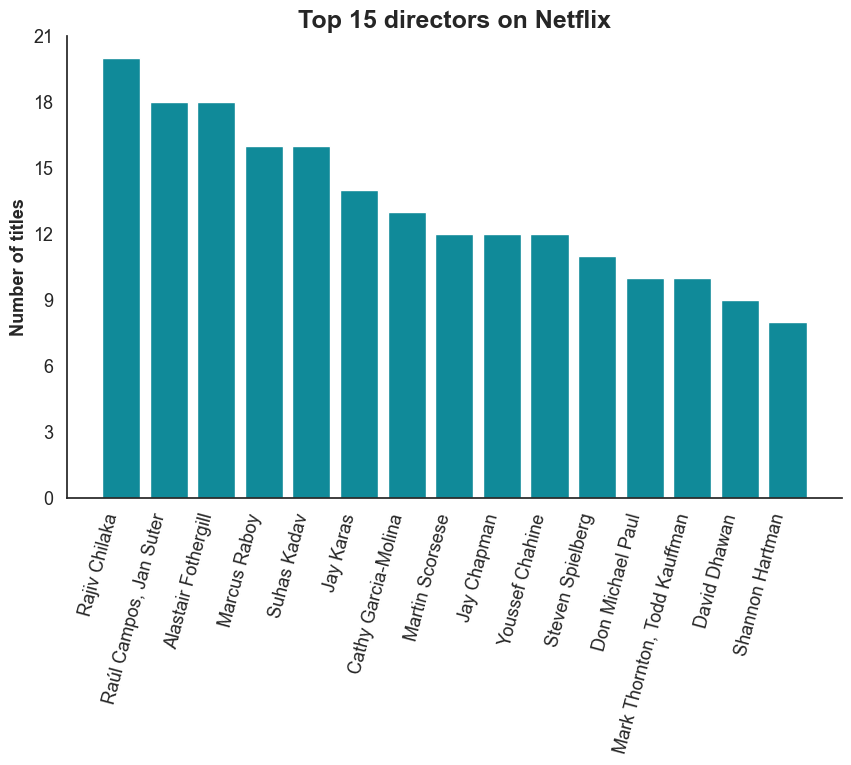

In [6]:
#grafico de barras
sns.set_style('white') #cambio el fondo
plt.figure(figsize=(10,6))
plt.bar(x=top_directors.index , 
        height= top_directors,
        color = "#108A99")
plt.xticks(rotation= 75, fontsize = 13, ha='right')
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Asegura que los ticks del eje y sean enteros

plt.title("Top 15 directors on Netflix", fontsize = 18, weight='bold')
plt.ylabel("Number of titles", fontsize=13, weight='bold')
sns.despine() #remuevo los bordes
plt.show()

## country

In [7]:
#top 5 paises con mas contenido en Netflix
top_countries = df_netflix['country'].value_counts().head()
top_countries

country
United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
Name: count, dtype: int64

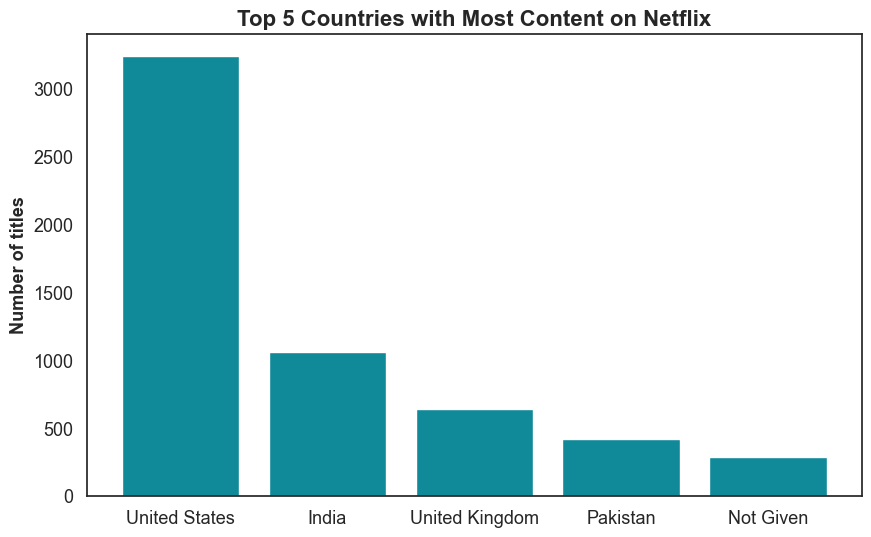

In [52]:
#grafico de barras
plt.figure(figsize= (10,6))
plt.bar(x = top_countries.index, 
        height= top_countries,
        color = "#108A99")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Top 5 Countries with Most Content on Netflix", fontsize = 16, weight='bold')
plt.ylabel("Number of titles", fontsize= 13, weight='bold')
plt.savefig("top-directors.png")
plt.show()

## release_year

In [9]:
#primero separo por año las peliculas de las series
movies_release_year = df_netflix[df_netflix['type'] == 'Movie']['release_year'].value_counts().sort_index()
series_release_year = df_netflix[df_netflix['type'] == 'TV Show']['release_year'].value_counts().sort_index()
#necesito crear un index en comum para que tengan el mismo tamaño y poder graficar ambas
# Crear un índice combinado de todos los años presentes en ambas 
combined_index = movies_release_year.index.union(series_release_year.index)

# Reindexar 
movies_release_year_aligned = movies_release_year.reindex(combined_index).fillna(0)
series_release_year_aligned = series_release_year.reindex(combined_index).fillna(0)

In [10]:
movies_release_year_aligned

release_year
1925      0.0
1942      2.0
1943      3.0
1944      3.0
1945      3.0
        ...  
2017    765.0
2018    766.0
2019    632.0
2020    517.0
2021    277.0
Name: count, Length: 74, dtype: float64

In [11]:
series_release_year_aligned

release_year
1925      1.0
1942      0.0
1943      0.0
1944      0.0
1945      1.0
        ...  
2017    265.0
2018    378.0
2019    397.0
2020    436.0
2021    315.0
Name: count, Length: 74, dtype: float64

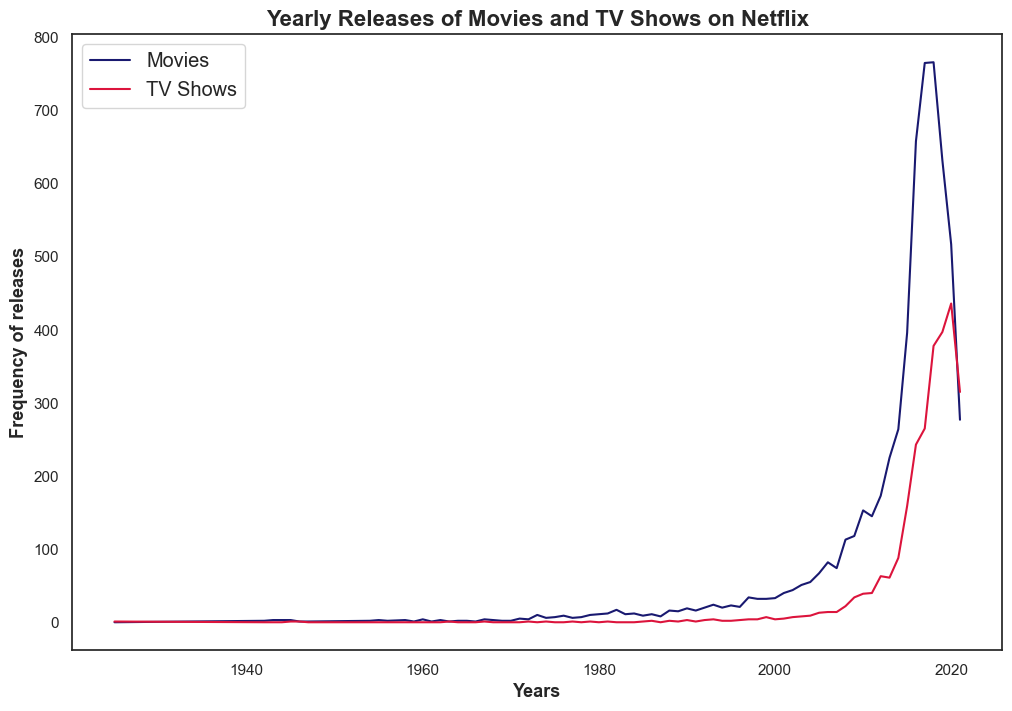

In [53]:
#grafico de lineas para comparar ambos datos
sns.set_style('white') #cambio el fondo
labels = ["Movies", "TV Shows"]
plt.figure(figsize = (12,8))

plt.plot(movies_release_year_aligned.index, movies_release_year_aligned.values,color = 'midnightblue')
plt.plot(series_release_year_aligned.index, series_release_year_aligned.values,color = 'crimson')

plt.title("Yearly Releases of Movies and TV Shows on Netflix", fontsize=16, fontweight = 'bold')
plt.xlabel("Years", fontsize= 13, weight='bold')
plt.ylabel("Frequency of releases",fontsize= 13, weight='bold')
plt.legend(labels= labels, fontsize= 'large')
plt.savefig("releases-year.png")
plt.show()

## rating

In [13]:
#separo las peliculas y los TV shows segun su clasificacion (rating) : apto para todo publico, mayores de 17, etc
movies_rating = df_netflix[df_netflix['type'] == 'Movie']['rating'].value_counts()
series_rating = df_netflix[df_netflix['type'] == 'TV Show']['rating'].value_counts()

In [14]:
movies_rating

rating
TV-MA       2062
TV-14       1426
R            796
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [15]:
series_rating

rating
TV-MA       1143
TV-14        729
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: count, dtype: int64

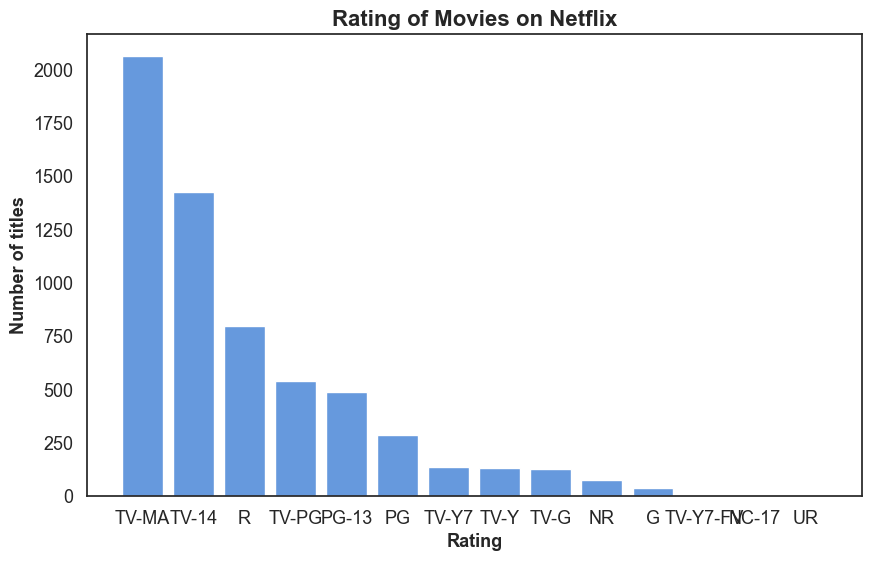

In [16]:
#grafico de barras rating peliculas
plt.figure(figsize= (10,6))
plt.bar(x = movies_rating.index, 
        height= movies_rating,
        color = "#69d")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Rating of Movies on Netflix", fontsize = 16, weight='bold')
plt.xlabel("Rating", fontsize= 13, weight='bold')
plt.ylabel("Number of titles", fontsize= 13, weight='bold')
plt.show()

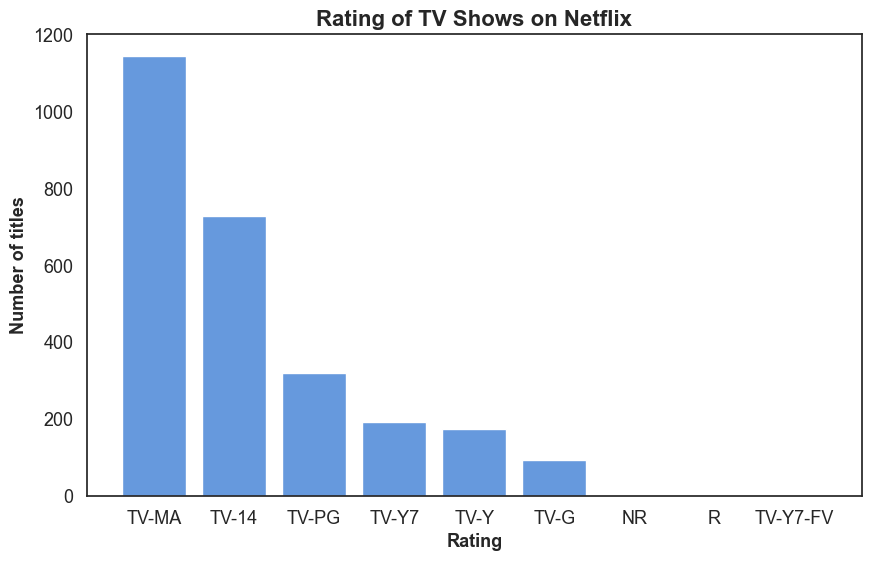

In [17]:
#grafico de barras rating TV Shows
plt.figure(figsize= (10,6))
plt.bar(x = series_rating.index, 
        height= series_rating,
        color = "#69d")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Rating of TV Shows on Netflix", fontsize = 16, weight='bold')
plt.xlabel("Rating", fontsize= 13, weight='bold')
plt.ylabel("Number of titles", fontsize= 13, weight='bold')
plt.show()

## duration

In [18]:
df_netflix

,type,title,director,country,date_added,release_year,rating,duration,category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8782,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8783,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8784,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8785,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [19]:
#Separo los valores de las peliculas y creo un arreglo con su duracion en minutos
movies_duration = df_netflix[df_netflix['type']=='Movie']['duration']
movies_duration = movies_duration.str.replace(' min', '').astype(int).tolist()
movies_duration

[90,
 91,
 125,
 104,
 87,
 127,
 76,
 76,
 71,
 131,
 39,
 36,
 34,
 35,
 46,
 91,
 67,
 65,
 61,
 166,
 103,
 97,
 106,
 147,
 94,
 161,
 111,
 110,
 105,
 96,
 106,
 124,
 116,
 98,
 91,
 115,
 122,
 55,
 99,
 99,
 88,
 100,
 23,
 102,
 93,
 96,
 95,
 85,
 97,
 95,
 83,
 182,
 106,
 147,
 87,
 85,
 95,
 92,
 90,
 84,
 97,
 48,
 93,
 145,
 145,
 96,
 91,
 119,
 97,
 110,
 80,
 128,
 90,
 143,
 273,
 36,
 36,
 61,
 117,
 119,
 114,
 94,
 106,
 99,
 115,
 118,
 76,
 91,
 115,
 95,
 108,
 117,
 37,
 121,
 88,
 63,
 142,
 113,
 154,
 95,
 108,
 120,
 100,
 82,
 124,
 114,
 104,
 94,
 94,
 35,
 93,
 97,
 109,
 101,
 105,
 102,
 101,
 103,
 106,
 118,
 86,
 121,
 77,
 229,
 76,
 95,
 98,
 15,
 89,
 120,
 110,
 83,
 121,
 105,
 94,
 156,
 112,
 95,
 107,
 114,
 129,
 86,
 44,
 97,
 68,
 116,
 125,
 107,
 127,
 92,
 128,
 135,
 124,
 136,
 165,
 124,
 136,
 150,
 112,
 119,
 133,
 142,
 93,
 113,
 116,
 106,
 145,
 95,
 34,
 47,
 124,
 93,
 108,
 90,
 92,
 86,
 82,
 70,
 84,
 96,
 97,
 56,
 

In [20]:
#Separo los valores de los tv shows y creo un arreglo con su duracion en temporadas
series_duration = df_netflix[df_netflix['type']=='TV Show']['duration']
series_duration = series_duration.str.replace(r' seasons?| Seasons?', '', regex=True).astype(int).tolist()
series_duration

[1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,


In [21]:
#verifico el total de los datos

In [22]:
len(movies_duration)

6124

In [23]:
len(series_duration)

2663

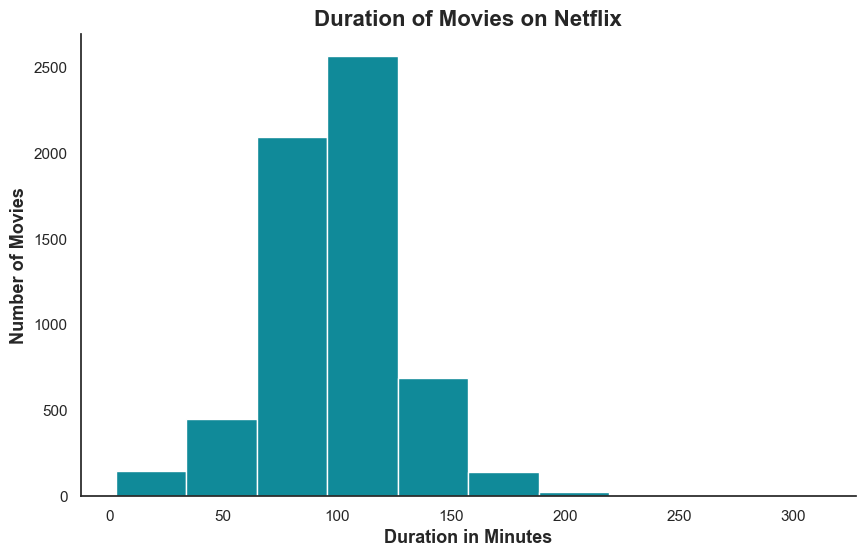

In [54]:
#histograma para las peliculas
plt.figure(figsize= (10, 6))
plt.hist(movies_duration,
         bins=10,
         color = '#108A99')
plt.title("Duration of Movies on Netflix", fontsize=16, weight = 'bold')
plt.xlabel("Duration in Minutes", fontsize=13, weight='bold')
plt.ylabel("Number of Movies",fontsize=13, weight='bold')
sns.despine() #remuevo los bordes
plt.savefig("duration-movies.png")
plt.show()

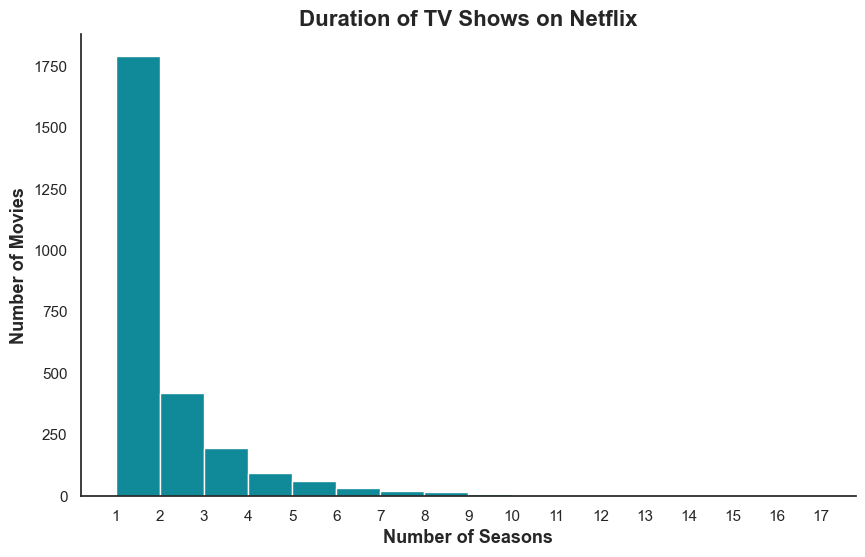

In [25]:
#histograma para los TV Shows
plt.figure(figsize= (10, 6))
plt.hist(series_duration,
         bins=16,
         color = '#108A99')
plt.title("Duration of TV Shows on Netflix", fontsize=16, weight = 'bold')
plt.xlabel("Number of Seasons", fontsize=13, weight='bold')
plt.ylabel("Number of Movies",fontsize=13, weight='bold')
sns.despine() #remuevo los bordes
#Ajusto las divisiones del eje x para que estén espaciadas cada 1 unidad
max_duration = max(series_duration)
plt.xticks(range(1, max_duration + 1))
plt.show()

## category

In [26]:
#separo de acuerdo a su tipo y su categoria
categories = df_netflix.groupby(['category', 'type'])['category'].value_counts().reset_index()
categories

,category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [27]:
#las 10 categorias de peliculas con mayor cantidad
top_10_movies_categories = categories[categories['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top_10_movies_categories

,category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


In [28]:
#las 10 categorias de tv show con mayor cantidad
top_10_series_categories = categories[categories['type'] =='TV Show'].sort_values(by='count', ascending=False).head(10)
top_10_series_categories

,category,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,120
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


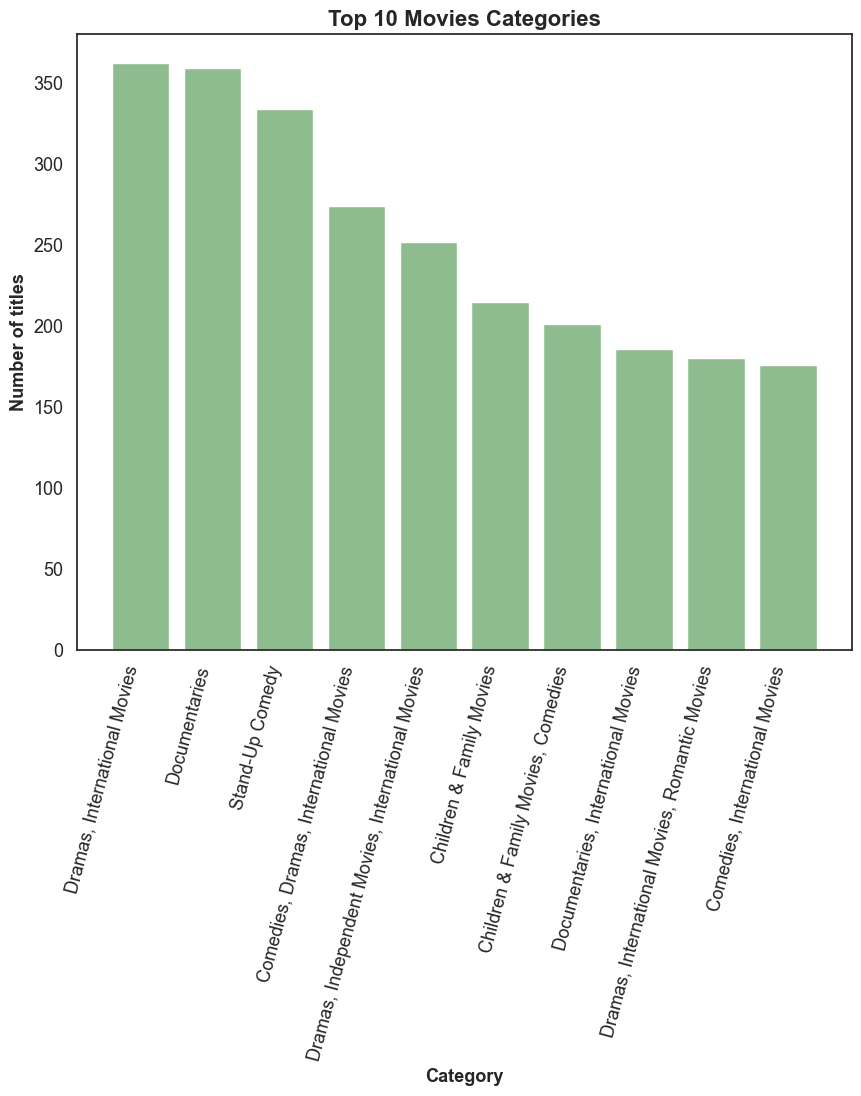

In [57]:
#grafico de barras
plt.figure(figsize=(10,8))
plt.bar(x = top_10_movies_categories['category'], 
        height= top_10_movies_categories['count'],
        color = "darkseagreen")
plt.xticks(fontsize = 13, rotation= 75, ha='right')
plt.yticks(fontsize = 13)

plt.title("Top 10 Movies Categories", fontsize = 16, weight='bold')
plt.ylabel("Number of titles", fontsize= 13, weight='bold')
plt.xlabel("Category", fontsize= 13, weight='bold')
plt.show()

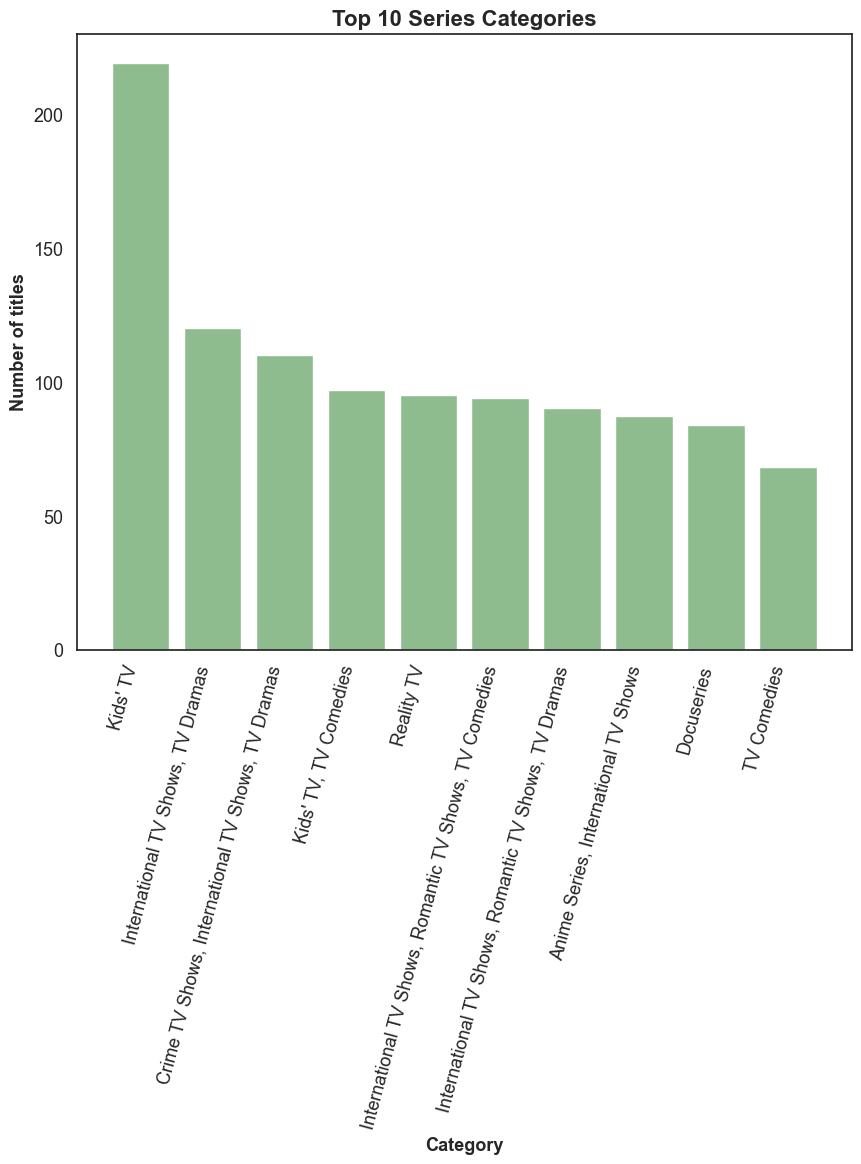

In [59]:
#grafico de barras para TV Shows
plt.figure(figsize=(10,8))
plt.bar(x = top_10_series_categories['category'], 
        height= top_10_series_categories['count'],
        color = "darkseagreen")
plt.xticks(fontsize = 13, rotation= 75, ha='right')
plt.yticks(fontsize = 13)

plt.title("Top 10 Series Categories", fontsize = 16, weight='bold')
plt.ylabel("Number of titles", fontsize= 13, weight='bold')
plt.xlabel("Category", fontsize= 13, weight='bold')
plt.show()